In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [276]:
df = pd.read_csv('beijing_air2.csv', encoding = 'utf8').dropna()

In [277]:
df.tail(5)

,Unnamed: 0,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars
43819,43820,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,5300000.0
43820,43821,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,5300000.0
43821,43822,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,5300000.0
43822,43823,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,5300000.0
43823,43824,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0,5300000.0


In [278]:
df.shape

(41757, 15)

In [279]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)

In [280]:
df['avg_air_qual'] = df['air_qual'].rolling(3).mean().round(2)

In [281]:
feature_columns = ['year', 'month', 'DEWP', 'TEMP','PRES','Iws','Is','Ir','cars','average_pm']
X = df[feature_columns]

In [282]:
y = df['pm2.5']

In [283]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
pm2.5         0
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
cars          0
average_pm    2
dtype: int64

In [284]:
df = df.dropna()

In [285]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
pm2.5         0
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
cars          0
average_pm    0
dtype: int64

In [286]:
df.to_csv("beijing4.csv")

In [253]:
sklearn.model_selection.train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [254]:
from sklearn.cross_validation import train_test_split



In [255]:
import sklearn.model_selection
import sklearn.metrics
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(X,y, test_size=5)

In [43]:
df.dtypes

Unnamed: 0      int64
No              int64
year            int64
month           int64
day             int64
hour            int64
pm2.5         float64
DEWP            int64
TEMP          float64
PRES          float64
cbwd           object
Iws           float64
Is              int64
Ir              int64
cars          float64
dtype: object

In [44]:
df.isnull().sum()

Unnamed: 0       0
No               0
year             0
month            0
day              0
hour             0
pm2.5         2067
DEWP             0
TEMP             0
PRES             0
cbwd             0
Iws              0
Is               0
Ir               0
cars             0
dtype: int64

In [45]:
#df.dropna(subset=['pm2.5'], inplace=True)
df['pm2.5'].fillna(0, inplace=True)

In [46]:
#df = df.loc[(df['month'] == 1) | (df['month'] == 2) | (df['month'] == 11) | (df['month'] == 12)]
#df = df.loc[(df['month'] == 1) | (df['month'] == 2)]

In [47]:
df.head()

,Unnamed: 0,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars
0,1,1,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,4000000.0
1,2,2,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,4000000.0
2,3,3,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,4000000.0
3,4,4,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,4000000.0
4,5,5,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,4000000.0


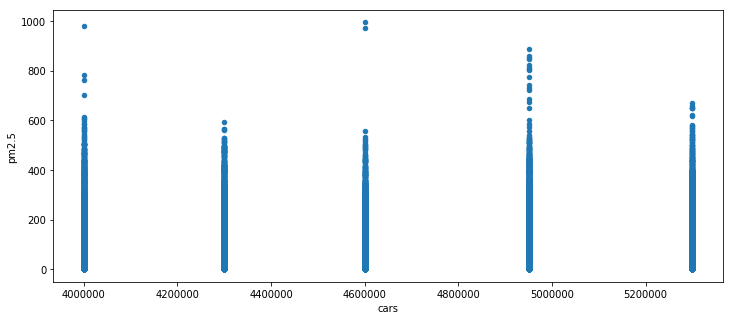

In [48]:


#plt.scatter(df['pm2.5'], df.cars)
# OR (with pandas 0.13 and up)
df.plot(kind='scatter', x='cars', y='pm2.5', figsize=(12, 5))

In [49]:
df.corr()

,Unnamed: 0,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cars
Unnamed: 0,1.000000,1.000000,9.797958e-01,1.993007e-01,1.880803e-02,5.471695e-04,0.012694,0.047668,0.078159,-0.024224,-0.062427,-0.029464,-0.016563,9.789840e-01
No,1.000000,1.000000,9.797958e-01,1.993007e-01,1.880803e-02,5.471695e-04,0.012694,0.047668,0.078159,-0.024224,-0.062427,-0.029464,-0.016563,9.789840e-01
year,0.979796,0.979796,1.000000e+00,-3.575502e-16,-1.663879e-16,0.000000e+00,0.016832,0.001122,0.045529,-0.012570,-0.064244,-0.017002,-0.024383,9.991715e-01
month,0.199301,0.199301,-3.575502e-16,1.000000e+00,1.079604e-02,-1.528210e-17,-0.025812,0.233975,0.170093,-0.062185,0.003043,-0.061672,0.036737,4.686256e-05
day,0.018808,0.018808,-1.663879e-16,1.079604e-02,1.000000e+00,-4.046030e-19,0.073689,0.028559,0.014791,-0.007070,-0.008954,-0.036826,0.002681,-5.388576e-05
hour,0.000547,0.000547,0.000000e+00,-1.528210e-17,-4.046030e-19,1.000000e+00,-0.021646,-0.020988,0.150066,-0.041928,0.056618,-0.002374,-0.006286,2.670333e-20
pm2.5,0.012694,0.012694,1.683182e-02,-2.581211e-02,7.368891e-02,-2.164584e-02,1.000000,0.158248,-0.089830,-0.045565,-0.234182,0.022259,-0.048954,1.838282e-02
DEWP,0.047668,0.047668,1.121574e-03,2.339746e-01,2.855899e-02,-2.098769e-02,0.158248,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090,1.007758e-03
TEMP,0.078159,0.078159,4.552854e-02,1.700926e-01,1.479104e-02,1.500656e-01,-0.089830,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121,4.629019e-02
PRES,-0.024224,-0.024224,-1.257001e-02,-6.218507e-02,-7.070048e-03,-4.192788e-02,-0.045565,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843,-1.216122e-02
